In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from bs4 import BeautifulSoup
import requests

## medical landscape data

In [3]:
# import changing medical landscape data from https://datacatalog.urban.org/dataset/changing-medical-debt-landscape-united-states
df = pd.read_excel('changing_medical_landscape.xlsx')


# drop unecessary 
df.drop(['usa', 'Share with medical debt in collections - Majority White', 'Median medical debt in collections in $2023 - Majority White','Share with medical debt in collections - Majority of Color', 'Median medical debt in collections in $2023 - Majority of Color', 'Hospital market concentration (HHI)', 'Number of Closures and Mergers', 'Share of non-elderly adults with a reported disability', 'Average household income in $2023'
 ], axis=1, inplace=True)

# Display the first few rows of the DataFrame
print(df.head())

   Year  Share with medical debt in collections  \
0  2011                                   0.188   
1  2012                                   0.190   
2  2013                                   0.195   
3  2014                                   0.193   
4  2015                                   0.188   

   Median medical debt in collections in $2023  \
0                                          830   
1                                          823   
2                                          842   
3                                          861   
4                                          865   

   Share of the population with no health insurance coverage  
0                                              0.151          
1                                              0.148          
2                                              0.145          
3                                              0.117          
4                                              0.094          


## healthcare insurance revenue data

In [4]:
#source: https://www.statista.com/statistics/214504/total-revenue-of-unitedhealth/
# sourced from company's publicly available financial reports and https://companiesmarketcap.com/
# https://about.kaiserpermanente.org/who-we-are/fast-facts
data = {
    'Year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'UnitedHealth Group Total Revenue': [
        101860000000, 110620000000, 122490000000, 130470000000, 157110000000, 
        184840000000, 201160000000, 226250000000, 242160000000, 257140000000,
        287600000000, 324160000000
    ],
    'Anthem Total Revenue' : [
        60710000000,  61710000000, 71020000000, 73870000000, 79150000000,  84860000000,  90030000000,  92100000000,  104210000000, 121860000000, 138630000000, 144340000000  
    ],
    'Aetna Total Revenue':[33780000000, 36600000000, 47290000000, 58000000000, 60340000000, 63160000000, 60540000000,0, 0, 0, 0, 0
    ], 
    'Oscar Health Total Revenue':[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1920000000, 4130000000],
    'Molina Total Revenue':[4760000000, 5970000000, 6580000000, 9660000000, 14170000000, 17780000000, 19880000000, 18890000000, 16820000000, 19420000000, 27770000000, 31970000000
    ],
    'Cigna Total Revenue':[21760000000, 29050000000, 32380000000, 34910000000, 37870000000, 39660000000, 41910000000, 48560000000, 153740000000, 160550000000, 174270000000, 180020000000
    ],
    'Kaiser Permanente Total Revenue' :[ 0, 0, 0, 56400000000,60700000000,64600000000,72700000000,79700000000,84500000000,88700000000,93100000000,95400000000
    ]

}


# Create the DataFrame
revenue_df = pd.DataFrame(data)

# Display the DataFrame
print(revenue_df)

    Year  UnitedHealth Group Total Revenue  Anthem Total Revenue  \
0   2011                      101860000000           60710000000   
1   2012                      110620000000           61710000000   
2   2013                      122490000000           71020000000   
3   2014                      130470000000           73870000000   
4   2015                      157110000000           79150000000   
5   2016                      184840000000           84860000000   
6   2017                      201160000000           90030000000   
7   2018                      226250000000           92100000000   
8   2019                      242160000000          104210000000   
9   2020                      257140000000          121860000000   
10  2021                      287600000000          138630000000   
11  2022                      324160000000          144340000000   

    Aetna Total Revenue  Oscar Health Total Revenue  Molina Total Revenue  \
0           33780000000               

In [5]:
## webscrape from propublica

# URL of the page
url = 'https://projects.propublica.org/nonprofits/organizations/411242261'

# Send a request to the website
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find all elements with the specified class
revenue_elements = soup.find_all(class_='row-revenue__number stack__item--size-1')

# Extracting data from the elements
revenues = []
for element in revenue_elements:
    # Strip any leading/trailing whitespace and remove dollar signs or commas
    revenue_text = element.text.strip().replace('$', '').replace(',', '')

    # Optionally convert revenue to integer if needed
    # Ensure that the revenue text is not empty and is a valid number before converting
    if revenue_text.isdigit():
        revenue = int(revenue_text)
    else:
        revenue = None

    # Append to list; you might want to also extract the year if available on the page
    revenues.append(revenue)

# reverse order so that its 2011-2023
revenues.reverse()

# add list to df
revenue_df['Medica Health Plus Total Revenue'] = revenues

# Print the DataFrame
print(revenue_df)


    Year  UnitedHealth Group Total Revenue  Anthem Total Revenue  \
0   2011                      101860000000           60710000000   
1   2012                      110620000000           61710000000   
2   2013                      122490000000           71020000000   
3   2014                      130470000000           73870000000   
4   2015                      157110000000           79150000000   
5   2016                      184840000000           84860000000   
6   2017                      201160000000           90030000000   
7   2018                      226250000000           92100000000   
8   2019                      242160000000          104210000000   
9   2020                      257140000000          121860000000   
10  2021                      287600000000          138630000000   
11  2022                      324160000000          144340000000   

    Aetna Total Revenue  Oscar Health Total Revenue  Molina Total Revenue  \
0           33780000000               

In [3]:
import requests
from bs4 import BeautifulSoup

# List of URLs you want to scrape
urls = [
    'https://projects.propublica.org/nonprofits/organizations/411242261',
    'https://projects.propublica.org/nonprofits/organizations/311143265',
    # Add more URLs as needed
]

# Dictionary to hold revenue data for each URL
revenue_data = {}

# Loop through each URL and scrape data
for url in urls:
    # Send a request to the website
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all elements with the specified class
    revenue_elements = soup.find_all(class_='row-revenue__number stack__item--size-1')

    # Extracting data from the elements
    revenues = []
    for element in revenue_elements:
        # Strip any leading/trailing whitespace and remove dollar signs or commas
        revenue_text = element.text.strip().replace('$', '').replace(',', '')

        # Optionally convert revenue to integer if needed
        # Ensure that the revenue text is not empty and is a valid number before converting
        if revenue_text.isdigit():
            revenue = int(revenue_text)
        else:
            revenue = None

        # Append to list; you might want to also extract the year if available on the page
        revenues.append(revenue)

    # Reverse order so that it's 2011-2023 (if needed based on data)
    revenues.reverse()

    # Store the list in the dictionary with the URL as key
    revenue_data[url] = revenues

# Now revenue_data dictionary contains all the lists, keyed by their respective URLs
print(revenue_data)


{'https://projects.propublica.org/nonprofits/organizations/411242261': [1742750971, 1758311981, 1412472432, 1898923332, 1959862328, 2538424327, 1494831948, 1039894413, 1383149041, 1158090888, 1218114241, 1320077888], 'https://projects.propublica.org/nonprofits/organizations/311143265': [2722762319, 3367359355, 3643754539, 5003075985, 6202791309, 6440829493, 7220866266, 7819337654, 8150209969, 9272879618, 9756197809, 10064129024]}


In [7]:
revenue_df['Caresource Total Revenue']= [2722762319, 3367359355, 3643754539, 5003075985, 6202791309, 6440829493, 7220866266, 7819337654, 8150209969, 9272879618, 9756197809, 10064129024]

## putting it all together

In [8]:
# Merge the DataFrames on 'Year'
merged_df = pd.merge(revenue_df, df, on='Year', how='inner')
merged_df.replace(0, np.nan, inplace=True)

# Display the merged DataFrame
print(merged_df)


    Year  UnitedHealth Group Total Revenue  Anthem Total Revenue  \
0   2011                      101860000000           60710000000   
1   2012                      110620000000           61710000000   
2   2013                      122490000000           71020000000   
3   2014                      130470000000           73870000000   
4   2015                      157110000000           79150000000   
5   2016                      184840000000           84860000000   
6   2017                      201160000000           90030000000   
7   2018                      226250000000           92100000000   
8   2019                      242160000000          104210000000   
9   2020                      257140000000          121860000000   
10  2021                      287600000000          138630000000   
11  2022                      324160000000          144340000000   

    Aetna Total Revenue  Oscar Health Total Revenue  Molina Total Revenue  \
0          3.378000e+10               

## export data

In [9]:
#merged_df.to_csv("insurance_data.csv", sep=',', encoding='utf-8')

In [12]:
merged_df.drop(['Share with medical debt in collections','Median medical debt in collections in $2023','Share of the population with no health insurance coverage'], axis=1, inplace=True)
merged_df.to_csv("revenue_only_data.csv", sep=',', encoding='utf-8')

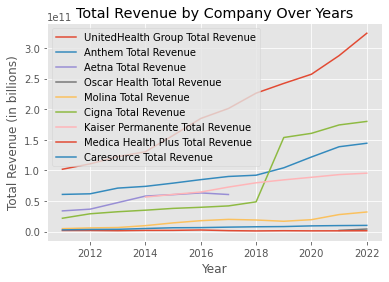

In [18]:
import matplotlib.pyplot as plt

# Set the style (optional)
plt.style.use('ggplot')

# Plotting each company's revenue as a separate line
# Exclude the last three columns by using df.columns[1:-3]
for column in merged_df.columns[1:-3]:  # Adjust here to exclude the last three columns
    plt.plot(merged_df['Year'], merged_df[column], label=column)

# Adding titles and labels
plt.title('Total Revenue by Company Over Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue (in billions)')

# Adding a legend
plt.legend()

# Show the plot
plt.show()


# Insurance Company Claims and Revenue in 2023

In [3]:
# Sources: https://www.statista.com/statistics/214504/total-revenue-of-unitedhealth/#:~:text=The%20UnitedHealth%20Group%20is%20a,billion%20U.S.%20dollars%20in%202023.
# https://www.statista.com/statistics/214529/total-revenue-of-wellpoint/#:~:text=Revenues%20reported%20by%20Elevance%20Health,billion%20U.S.%20dollars%20by%202023.
# https://acdis.org/articles/news-largest-payers-ranked-revenue-2023#:~:text=Total%20revenues%20at%20Aetna%20in,up%2010.2%25%20year%20over%20year.
# https://www.caresource.com/newsroom/fact-sheets/company-fact-sheet/
# https://www.macrotrends.net/stocks/charts/MOH/molina-healthcare/revenue#:~:text=Molina%20Healthcare%20annual%20revenue%20for,a%2042.98%25%20increase%20from%202020.
# https://ir.hioscar.com/financials/quarterly-results/default.aspx
# https://about.kaiserpermanente.org/news/press-release-archive/kaiser-foundation-health-plan-and-hospitals-report-2023-financial-results#:~:text=Operating%20revenues%20for%202023%20were,of%20%243.2%20billion%20in%202022.

claims_revenue_2023 = {
    "Company":["UnitedHealth Group", "Medica", "Anthem", "Aetna", "CareSource", "Molina", "Cigna", "Oscar Health", "Kaiser Permanente"],
    "Denied Claims": [0.32, 0.27, 0.23, 0.2, 0.2, 0.19, 0.18, 0.12, 0.07],
    "Revenue (USD)": [371620000000, 2000000000, 171340000000, 186800000000, 11100000000, 34072000000, 195300000000, 2400000000, 100800000000]
}

claims_revenue_2023 = pd.DataFrame(claims_revenue_2023)

print(claims_revenue_2023)

              Company  Denied Claims  Revenue (USD)
0  UnitedHealth Group           0.32   371620000000
1              Medica           0.27     2000000000
2              Anthem           0.23   171340000000
3               Aetna           0.20   186800000000
4          CareSource           0.20    11100000000
5              Molina           0.19    34072000000
6               Cigna           0.18   195300000000
7        Oscar Health           0.12     2400000000
8   Kaiser Permanente           0.07   100800000000


## export

In [4]:
claims_revenue_2023.to_csv("insurance_claims_revenue.csv", sep=',', encoding='utf-8')

# Scraping 

In [15]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re

headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)"
        " Chrome/91.0.4472.124 Safari/537.36"
    )
}

url = "https://www.economicliberties.us/data-tools/unitedhealth-group-abuse-tracker/"
response = requests.get(url, headers=headers)
response.raise_for_status()
soup = BeautifulSoup(response.text, 'html.parser')
tbody = soup.find('tbody')

dates = []
categories = []
abuses = []
details = []

if tbody:
    for row in tbody.find_all('tr'):
        cells = row.find_all('td')
        # print(cells)
        if cells:  
            date_text = cells[0].get_text(strip=True)  # Clean text
            # print(date_text)
            category = cells[1].get_text(strip=True)
            abuse = cells[2].get_text(strip=True)
            detail = cells[3].get_text(strip=True)

            dates.append(date_text)
            categories.append(category)
            abuses.append(abuse)
            details.append(detail)

# print(dates)
# print(categories)
# print(abuses)
# print(details)

abuse_tracker_data = {"Date": dates, "Category": categories, "Abuse": abuses, "Details": details}
abuse_tracker_data = pd.DataFrame(abuse_tracker_data)

print(abuse_tracker_data)


                   Date                                           Category  \
0            11/19/2024                                     Denial of Care   
1            11/11/2024                                     Denial of Care   
2            10/21/2024                           Upcoding and Overbilling   
3             9/20/2024  Anticompetitive Steering of Patients and Provi...   
4             9/19/2024                                  Corrupt Practices   
5             9/18/2024                                  Corrupt Practices   
6             7/25/2024  Anticompetitive Steering of Patients and Provi...   
7             6/27/2024                                  Corrupt Practices   
8              6/6/2024                                  Corrupt Practices   
9             4/11/2024                                  Corrupt Practices   
10            3/22/2024                          Patient Privacy Violation   
11            3/18/2024                           Upcoding and O

## export abuse tracker data

In [16]:
abuse_tracker_data.to_csv("united_abuse_tracker.csv", sep=',', encoding='utf-8')